# K-means clustring example
# K-means comes under unsupervised machine learning technique
## terms we will use here like Cluster, Centroid
## Cluster: we will partition our dataset into K distinct cluster
## Centroid: nearest mean cluster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [4]:
X = np.array([
	[7.5, 8.0],
	[9.0, 7.0],
	[10.5, 6.5],
	[6.0, 9.0],
	[13.0, 5.5],
	[8.0, 8.5],
	[14.0, 4.5],
	[9.5, 7.0],
	[7.0, 9.0],
	[12.0, 6.0]
])
df=pd.DataFrame(X, columns= ['EntryTime','Duration'])
df

,EntryTime,Duration
0,7.5,8.0
1,9.0,7.0
2,10.5,6.5
3,6.0,9.0
4,13.0,5.5
5,8.0,8.5
6,14.0,4.5
7,9.5,7.0
8,7.0,9.0
9,12.0,6.0


In [2]:
#create model
model = KMeans(n_clusters=3,random_state=0)

In [13]:
df['Cluster'] = model.fit_predict(df[['EntryTime','Duration']])
centers = model.cluster_centers_
df

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,EntryTime,Duration,Cluster
0,7.5,8.0,0
1,9.0,7.0,2
2,10.5,6.5,2
3,6.0,9.0,0
4,13.0,5.5,1
5,8.0,8.5,0
6,14.0,4.5,1
7,9.5,7.0,2
8,7.0,9.0,0
9,12.0,6.0,1


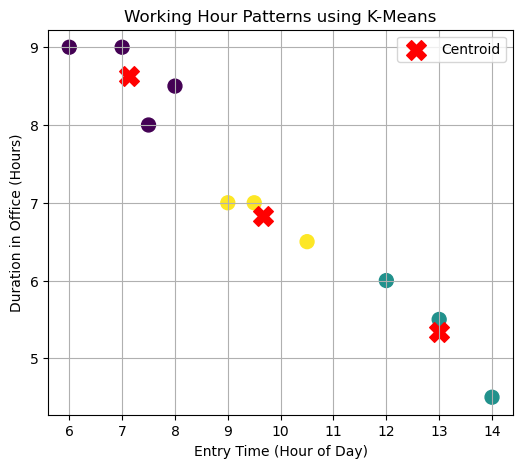

In [14]:
plt.figure(figsize=(6,5))

plt.scatter(df['EntryTime'], df['Duration'], 
            c=df['Cluster'], s=100)

plt.scatter(centers[:,0], centers[:,1], 
            marker='X', s=200, c='red', label='Centroid')

plt.xlabel('Entry Time (Hour of Day)')
plt.ylabel('Duration in Office (Hours)')
plt.title('Working Hour Patterns using K-Means')
plt.legend()
plt.grid(True)
plt.show()


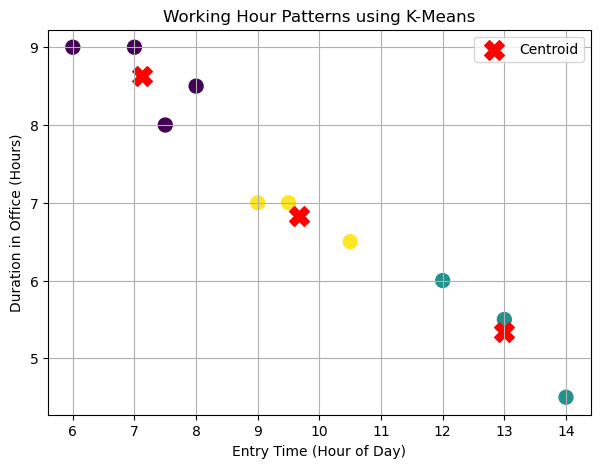

In [15]:
plt.figure(figsize=(7,5))

plt.scatter(df['EntryTime'], df['Duration'], c=df['Cluster'], s=100)

plt.scatter(centers[:,0], centers[:,1], marker='X', s=200, c='red', label='Centroid')

plt.xlabel('Entry Time (Hour of Day)')
plt.ylabel('Duration in Office (Hours)')
plt.title('Working Hour Patterns using K-Means')
plt.legend()
plt.grid(True)
plt.show()


## Lab: Customer Segmentation using K-Means
    Goal: Group customers by Annual Income and Spending Score.
    1.Download customer.csv from https://github.com/salman1256/aimltraining/tree/main/Day-17(II)
    2.Load data from customers.csv
    3.Visualize the data
    4.Cluster
    5.Interpret each segment like 'High income / high spender' etc.
    6.Create Scatter plot for the same


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [17]:
df = pd.read_csv('customers.csv')
print(df.head())

   CustomerID  AnnualIncome  SpendingScore
0           1            15             79
1           2            16             81
2           3            17             76
3           4            18             75
4           5            19             73


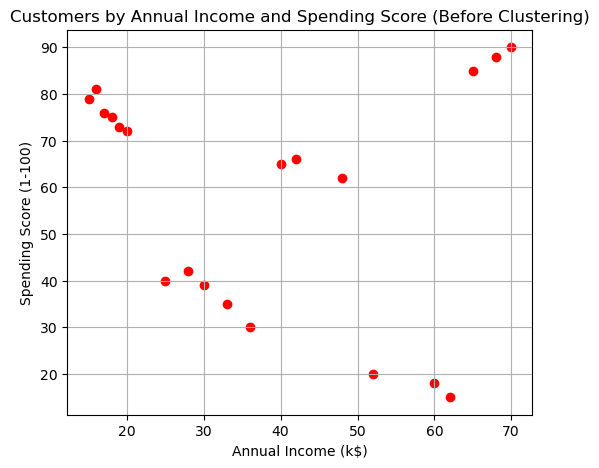

In [32]:
X = df[['AnnualIncome', 'SpendingScore']]

# Step 4: Visualize the Data (Before Clustering)
plt.figure(figsize=(6,5))
plt.scatter(X['AnnualIncome'], X['SpendingScore'], color='red')
plt.title('Customers by Annual Income and Spending Score (Before Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

In [33]:
# Step 5: Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=40)
df['Cluster'] = kmeans.fit_predict(X)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
# Step 6: View Cluster Centers
centers = kmeans.cluster_centers_
print("Cluster Centers:\n", centers)

Cluster Centers:
 [[30.4        37.2       ]
 [17.5        76.        ]
 [67.66666667 87.66666667]
 [58.         17.66666667]
 [43.33333333 64.33333333]]


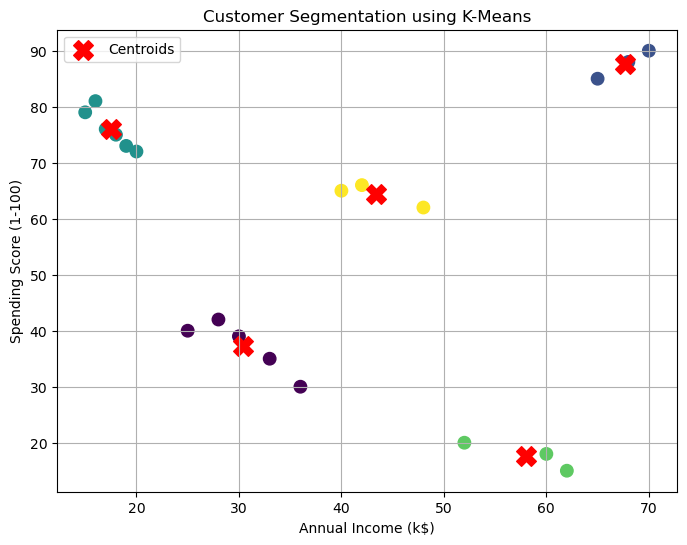

In [25]:
# Step 7: Visualize the Clusters
plt.figure(figsize=(8,6))
plt.scatter(X['AnnualIncome'], X['SpendingScore'],
            c=df['Cluster'], s=80)
plt.scatter(centers[:,0], centers[:,1], c='red', marker='X', s=200, label='Centroids')

plt.title('Customer Segmentation using K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Step 8: Interpret Clusters (Example Mapping)
cluster_mean = df.groupby('Cluster')[['AnnualIncome','SpendingScore']].mean()
print("\nCluster Summary:")
print(cluster_mean)


Cluster Summary:
         AnnualIncome  SpendingScore
Cluster                             
0           30.400000      37.200000
1           67.666667      87.666667
2           17.500000      76.000000
3           58.000000      17.666667
4           43.333333      64.333333
